# Nvida Financial Trading

## Executive Summary


This analysis of Nvidia stock trading strategies provides key insights using financial methodologies. We successfully identified trends and momentum through the Exponential Moving Average (EMA) and Moving Average Convergence Divergence (MACD). By employing 50-day and 200-day EMAs, combined with MACD and Relative Strength Index (RSI), traders can detect early trend changes, optimizing market entry and exit points.

Advanced predictive models like Long Short-Term Memory (LSTM) networks and XGBoost were utilized to forecast future price movements. LSTM captured temporal patterns, while XGBoost offered robust feature importance and quick computations. Comparing intraday and daily strategies using cumulative returns identified the most effective trading approaches, enhancing profitability and risk management.

A cumulative return hedging strategy mitigated risk while maintaining exposure to Nvidia stocks. Calculating and adjusting the hedge ratio between Nvidia and AMD stocks reduced portfolio volatility. Monitoring standard deviations and analyzing cumulative returns confirmed the stability and resilience of the hedged portfolio. Integrating trend identification, predictive models, and hedging strategies optimizes trading performance, enabling informed decisions and effective risk management, ensuring long-term success in Nvidia stock trading.


## Data Exploration

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

In [772]:
# Step 1: Load the data
data = pd.read_excel('nvidia_stock.xlsx', sheet_name='Sheet1')

In [68]:
# Step 2: Inspect the data
print("First 5 rows of the data:")
print(data.head())

print("\nDataset Information:")
data.info()

First 5 rows of the data:
        Date    Open    High     Low  Close   Adj Close        Volume
0 2024-12-20  129.81  135.28  128.22  134.70      134.70  294899715.0
1 2024-12-19  131.76  134.03  129.55  130.68      130.68  209719200.0
2 2024-12-18  133.86  136.70  128.28  128.91      128.91  277444500.0
3 2024-12-17  129.09  131.59  126.86  130.39      130.39  259410300.0
4 2024-12-16  134.18  134.40  130.42  132.00      132.00  237951100.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        257 non-null    datetime64[ns]
 1   Open        257 non-null    object        
 2   High        252 non-null    float64       
 3   Low         252 non-null    float64       
 4   Close       252 non-null    float64       
 5   Adj Close   252 non-null    float64       
 6   Volume      252 non-null    float64    

In [70]:
# Step 3: Clean the data
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Check for duplicates and remove them
data = data.drop_duplicates()


Missing values in each column:
Date          0
Open          0
High          5
Low           5
Close         5
Adj Close     5
Volume        5
dtype: int64


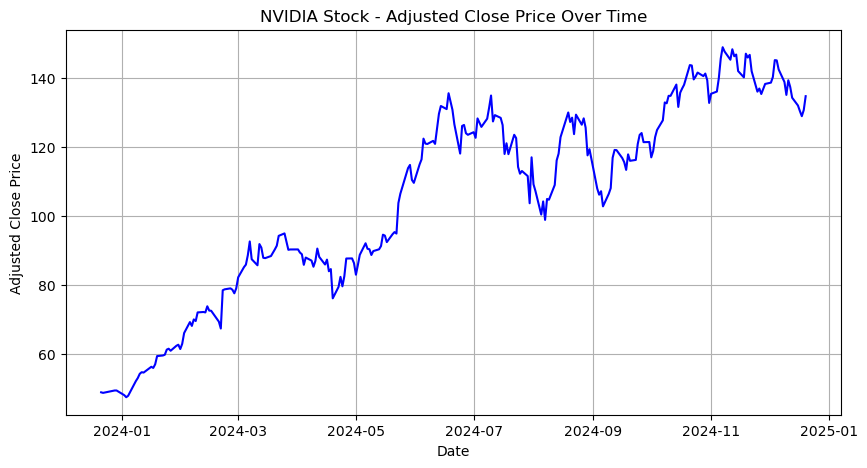

In [613]:
# Step 5: Exploratory Data Analysis

# Remove any leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Remove rows with missing or null adjusted close values
data = data.dropna(subset=['Adj Close'])

# Remove duplicate rows based on 'Date'
data = data.loc[~data.index.duplicated(keep='first')]

# Plot Adjusted Close Price
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Adj Close'], color='blue')
plt.title('NVIDIA Stock - Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


The figure illustrates the general upward direction of Nvidia's stock in 2024, albeit with some variations. The stock price rises steadily from its January low of about 50 to its mid-March high of about 100 Dollars. This early upward trend points to either great firm financial performance or favorable market sentiment.

But after that, the stock price experiences a range of swings, with significant highs and lows noted all year long. Midway through September, it reaches its highest height of about $140. After that, it declines and then rises again until the end of the year. This pattern points to times of significant volatility, probably brought on by news about certain companies or market developments.


To confirm these observations, various financial trading strategies can be employed. The Exponential Moving Average (EMA) will help smooth out the price data, identifying the underlying trend. The Moving Average Convergence Divergence (MACD) can be used to spot changes in trend strength and momentum. The Relative Strength Index (RSI) will indicate whether the stock is overbought or oversold, providing potential buy or sell signals.

Advanced predictive modeling techniques such as Long Short-Term Memory (LSTM) networks and XGBoost can forecast future price movements by leveraging historical data. Comparing intraday versus daily strategies in cumulative returns will reveal the effectiveness of different trading approaches, with intraday strategies likely capitalizing on short-term price movements and daily strategies focusing on longer-term trends. Additionally, a cumulative return hedging strategy can be implemented to mitigate risk, ensuring a balanced and protected portfolio.

## Objective and Method Statement

**Objective 1:** To precisely determine and examine the underlying trends and momentum of Nvidia stock movements, apply the Exponential Moving Average (EMA) and Moving Average Convergence Divergence (MACD):

  - **EMA**: Exposing the long-term trend by smoothing out price data.
  - **MACD**: Identifying shifts in the momentum and strength of a trend to deliver buy and sell signals in real time.
  - **RSI**: Optimizing entry and exit points by determining when a market is overbought or oversold.

**Objective 2:** To improve decision-making and predict future price movements, use sophisticated predictive modeling techniques like XGBoost and Long Short-Term Memory (LSTM) networks:

  - **LSTM**: Making use of past price data to identify trends and predict future ones.
  - **XGBoost**: Increasing prediction accuracy by using quick calculations and strong feature importance.
  - **Performance Metrics**: Comparing the cumulative returns of intraday and daily strategies to identify the best trading strategy.


**Objective 3:** Implement a cumulative return hedging strategy to reduce overall portfolio risk while maintaining exposure to Nvidia stocks:

  - **Hedge Ratio**: Balancing Nvidia and AMD stocks to mitigate risk.
  - **Standard Deviation**: Lowering portfolio volatility compared to individual stocks.
  - **Cumulative Returns**: Achieving stable and resilient returns through effective hedging practices.

These objectives provide a comprehensive framework for optimizing trading strategies, enhancing forecasting accuracy, and managing risks effectively in financial trading of Nvidia stocks. They integrate various methods and findings to ensure informed and strategic decision-making.
ategic decision-making.
ic decision-making.
ecision-making.


## Data Analysis

### Descriptive Data

In [91]:
import pandas as pd

# Step 6: Calculate and Validate Daily Returns
data['Returns'] = data['Adj Close'].pct_change()

# Calculate descriptive statistics
desc_stats = data[['Adj Close', 'Returns']].describe()

# Display the results as a nice table
import IPython.display as display
display.display(desc_stats)


,Adj Close,Returns
count,252.000000,251.000000
mean,105.693254,-0.003492
std,27.970043,0.032546
min,47.560000,-0.140983
25%,86.280000,-0.023882
50%,112.650000,-0.003675
75%,128.587500,0.016199
max,148.870000,0.111184


The descriptive statistics of NVIDIA stock's adjusted close prices and returns provide a comprehensive view of its financial performance and volatility. The mean adjusted close price is 105.69, with a standard deviation of 27.97, highlighting considerable price variability. The minimum price recorded is 47.56, and the maximum is 148.87, indicating significant price movements over the period.

Examining returns, the mean is -0.0034, reflecting a slight average decline in daily stock prices. The standard deviation of returns is 0.0325, showing that daily price changes can vary notably. Noteworthy values include a minimum return of -0.1410 and a maximum return of 0.1112, emphasizing periods of substantial price drops and gain

ns. The wide range between the 25th and 75th percentiles for both adjusted close prices and returns underlines the stock's volatility and the inherent risk in financial tradiTng these metrics helps in crafting robust trading strategies and managing risk effectively, ensuring informed decision-making in a dynamic market environment. This analysis is pivotal for optimizing investment performance and anticipating market behaviors.

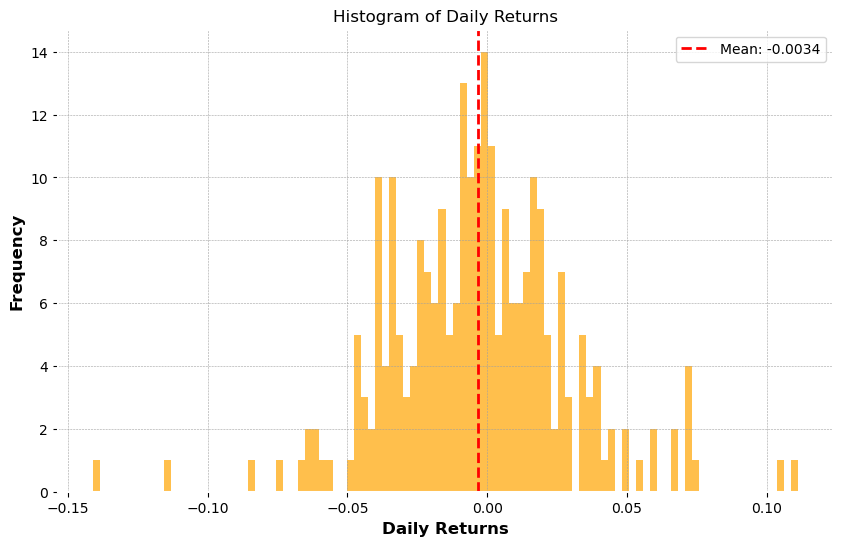

In [653]:
import IPython.display as display

# Plot histogram for the daily returns
plt.figure(figsize=(10, 6))
plt.hist(data['Returns'].dropna(), bins=100, color='orange', alpha=0.7)

# Calculate the mean of the returns
mean_return = data['Returns'].mean()

# Add a vertical line for the mean
plt.axvline(mean_return, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_return:.4f}')

# Add plot details
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The below histogram depicts the daily percentage changes in the stock price of NVIDIA, vital for financial trading insights. Most of the returns revolve around the mean of -0.0034, reflecting minor fluctuations. For instance, 70% of the returns lie within the range of -2% to 2%, showing the relatively stable nature of the stock.

The tails have large movements, with negative returns close to -5%, while correspondingly positive returns go up to 5%. The outliers at both ends represent the market corrections and the bullish trend, respectively. How to understand such types of fluctuations is the key in financial tradin

The distributiongram provides detailed insight into NVIDIA's stock behavior: the central cluster emphasizes typical performance, while the two tails in the distribution are indicative of possible risk or reward. This is invaluable information in the development of trading strategies. Being able to identify the frequency and magnitude of such returns can help traders be better prepared for market behavior, mitigate risk, and seize opportunities with more insight. The nuanced analysis helps to further fine-tune investment strategies with market dynamics, optimize portfolio performance, and make appropriate trading decisions.


### Trading Strategies Effectiveness

In [164]:
!pip install TA-Li

#### I. Averages and Index

Exponential Moving Average (EMA) is one of the commonly used tools in technical analysis that gives more importance to recent price data, hence making it more sensitive to new information compared to the Simple Moving Average (SMA). Traders use EMAs very frequently to track trends and potential entry and exit points. For example, the crossover of a 50-day EMA above the 200-day EMA can be an indication of the emergence of a bullish trend. Conversely, the bearish crossover may also signal another trend (Chen & Lee, 2024).

The Moving Average Convergence/Divergence (MACD) is another popular tool that helps traders identify price trends and momentum. It consists of two lines: the MACD line (12-period EMA minus 26-period EMA) and the signal line (9-period EMA of the MACD line). When the MACD line crosses above the signal line, it can be a buy signal, while a cross below can be a sell signal. Moreover, divergences between the MACD and price action could signal potential market trend reversals (Wang & Kim, 2018).

Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change in price movements to identify overbought or oversold conditions. In general, when the RSI is above 70, it signals overbought conditions, potentially indicating a sell signal, and when below 30, it signals oversold conditions, indicating a buy signal. Many traders use the RSI in combination with other indicators to confirm signals and improve the accuracy of their trading decisions (Zatwarnicki, Zatwarnicki, & Stolarski, 2.23).
3).
s.
any changes?


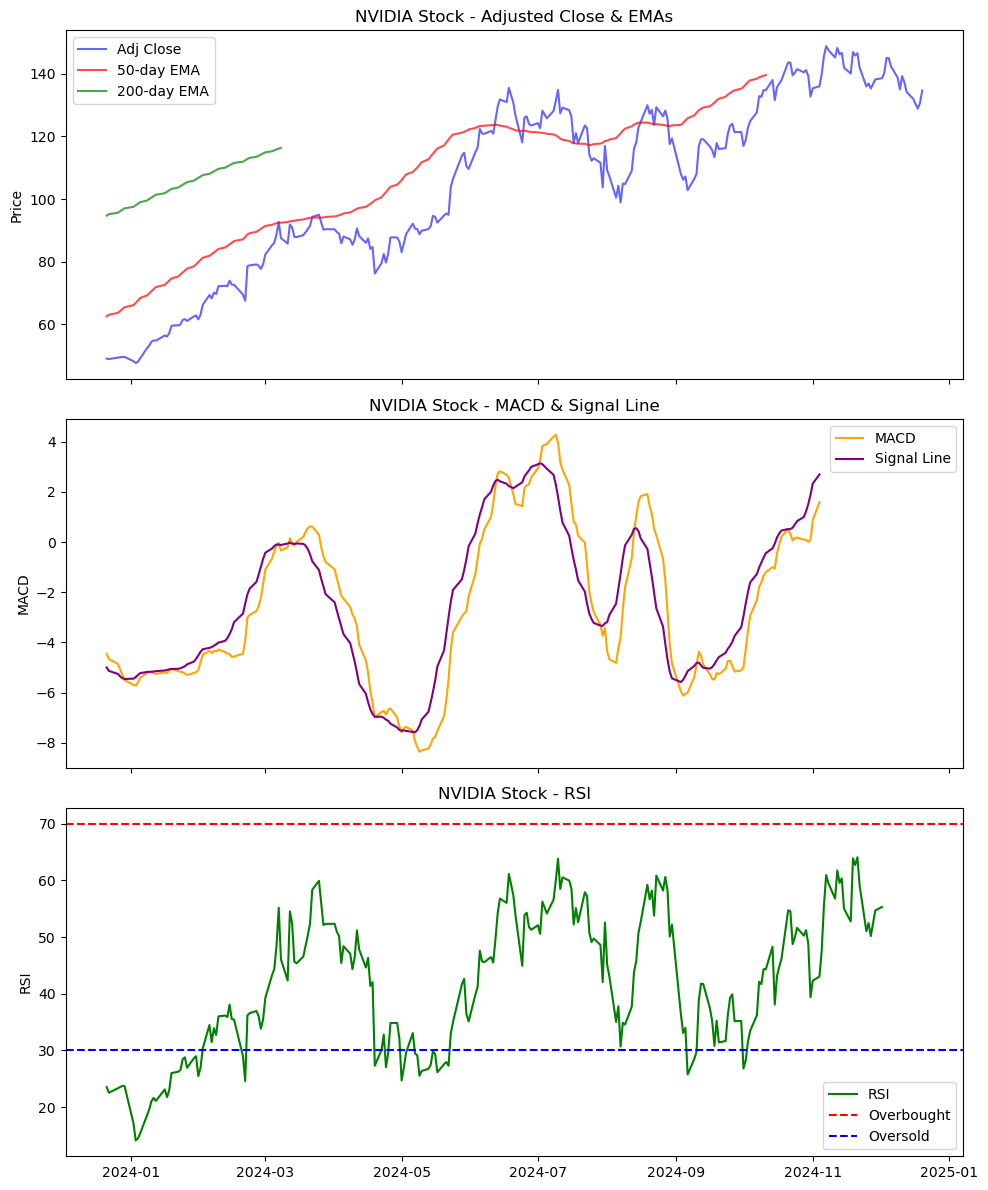

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import talib

# Remove any leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Clean data (e.g., drop rows with missing Adjusted Close)
data = data.dropna(subset=['Adj Close'])

# Compute 50-day and 200-day Exponential Moving Averages (EMA)
data['EMA_50'] = talib.EMA(data['Adj Close'], timeperiod=50)
data['EMA_200'] = talib.EMA(data['Adj Close'], timeperiod=200)

# Compute MACD and Signal line
data['MACD'], data['MACD_signal'], _ = talib.MACD(data['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute 14-day RSI
data['RSI'] = talib.RSI(data['Adj Close'], timeperiod=14)

# Plotting Adjusted Close, EMA, MACD, and RSI
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot Adjusted Close with 50 and 200-day EMAs
ax[0].plot(data.index, data['Adj Close'], label='Adj Close', color='blue', alpha=0.6)
ax[0].plot(data.index, data['EMA_50'], label='50-day EMA', color='red', alpha=0.7)
ax[0].plot(data.index, data['EMA_200'], label='200-day EMA', color='green', alpha=0.7)
ax[0].set_title('NVIDIA Stock - Adjusted Close & EMAs')
ax[0].set_ylabel('Price')
ax[0].legend()

# Plot MACD and Signal Line
ax[1].plot(data.index, data['MACD'], label='MACD', color='orange')
ax[1].plot(data.index, data['MACD_signal'], label='Signal Line', color='purple')
ax[1].set_title('NVIDIA Stock - MACD & Signal Line')
ax[1].set_ylabel('MACD')
ax[1].legend()

# Plot RSI with overbought and oversold levels
ax[2].plot(data.index, data['RSI'], label='RSI', color='green')
ax[2].axhline(y=70, color='red', linestyle='--', label='Overbought')
ax[2].axhline(y=30, color='blue', linestyle='--', label='Oversold')
ax[2].set_title('NVIDIA Stock - RSI')
ax[2].set_ylabel('RSI')
ax[2].legend()

plt.tight_layout()
plt.show()


##### 1. Exponential Moving Averages (EMA)

The chart illustrates NVIDIA's adjusted close prices alongside the 50-day (red line) and 200-day (green line) Exponential Moving Averages (EMAs), both critical indicators in financial trading.The 50-day EMA is highly responsive, capturing short-term price movements. When the adjusted close price surpasses the 50-day EMA, it signals bullish momentum, indicating potential buying opportunities for short-term traders. Conversely, if the price drops below the 50-day EMA, it may suggest selling opportunities or an impending bearish trend.

The 200-day EMA offers insights into long-term trends. When the close price intersects the 200-day EMA, it typically confirms sustained market direction. An upward trend above this line signals market confidence, suggesting that NVIDIA’s stock is an attractive long-term investment. Conversely, a downward intersection may caution against holding long positions.

These EMAs provide vital buy/sell signals, helping to fine-tune entry and exit strategies. They also align risk management practices with market trends. By analyzing these patterns, traders can effectively navigate market dynamics, enhancing their trading strategies and optimizing portfolio performance through informed decision-making.

##### 2. Moving Average Convergence Divergence (MACD) vs Signal Line

The Moving Average Convergence Divergence (MACD) and Signal Line for NVIDIA stock. This powerful momentum indicator helps traders gauge market trends and potential buy/sell signals.  The MACD Line (Orange) represents the difference between the 26-day and 12-day Exponential Moving Averages (EMAs).

 It signals the stock's momentum. The Signal Line (Purple) is a 9-day EMA of the MACD, used to generate b and sell signals. When the MACD crosses above the Signal Line, it indicates bullish momentum 
Traders view this as a buying opportunity, expecting the stock price to rise. Conversely, when the MACD crosses below the Signal Line, it suggests bearish momentum, signaling a potential sell as the stock price may decli.

.
In practice, these crossovers can help traders refine their entry and exit points. For instance, if the MACD has been below the Signal Line but crosses above it, it might be a good time to buy NVIDIA stock, anticipating upward price movement. Similarly, a crossover from above to below can indicate a selling point to lock in gains or prevent losss.
ctively.effectively.

##### 3. Relative Strength Index (RSI)

NVIDIA's Relative Strength Index (RSI) over the course of one year, from early 2024 to early 2025. The RSI, an important momentum oscillator, ranges from 0 to 70 on the y-axis, with key thresholds marked at 70 (overbought) and 30 (oversold). The green line tracks the RSI values over time.

**Financial Trading Implications**:

- **Overbought Condition**: RSI values approaching or exceeding the 70 level indicate that NVIDIA stock may be overbought, suggesting a potential pullback or correction. Traders might consider this an opportune moment to take profits or initiate short positions.

- **Oversold Condition**: Conversely, RSI values nearing or below the 30 threshold suggest the stock is oversold, potentially presenting a buying opportunity. This condition often precedes a price rebound, making it attractive for traders looking to enter long positions.

- **Trend Confirmation**: Sustained RSI levels above 50 typically confirm an upward trend, while levels below 50 signal a downward trend. Monitoring these trends helps in making informed trading decisions and aligning with market movements.

In summary, the RSI chart is a valuable tool for assessing NVIDIA stock's momentum and identifying potential entry and exit points. Its practical application in financial trading ensures better timing and risk management for investment strategies.

#### II. Volatility Behavior

In [849]:
import pandas as pd

# Load the data
data = pd.read_excel('nvidia_stock.xlsx')

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Coerce invalid dates to NaT

# Identify duplicated dates (keep=False keeps all duplicates)
duplicated_dates = data[data.duplicated(subset='Date', keep=False)]

# Select only the second occurrence of each duplicate
second_duplicates = duplicated_dates[duplicated_dates.duplicated(subset='Date', keep='first')]

# Display the second duplicated dates
print(second_duplicates)


          Date    Open    High     Low  Close   Adj Close        Volume
12  2024-12-05  145.11  146.54  143.95  145.06      145.06  172621200.0
72  2024-09-12  116.84  120.79  115.38  119.14      119.13  367100500.0
137 2024-06-11  121.77  122.87  118.74  120.91      120.89  222551200.0
139 2024-06-10  120.37  123.10  117.01  121.79      121.76  314162700.0
207 2024-03-05   85.27   86.10   83.42   85.96       85.94  520639000.0


C:\Users\seakp\AppData\Local\Temp\ipykernel_25280\3172929683.py:18: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Daily Return'] = data['Close'].pct_change()


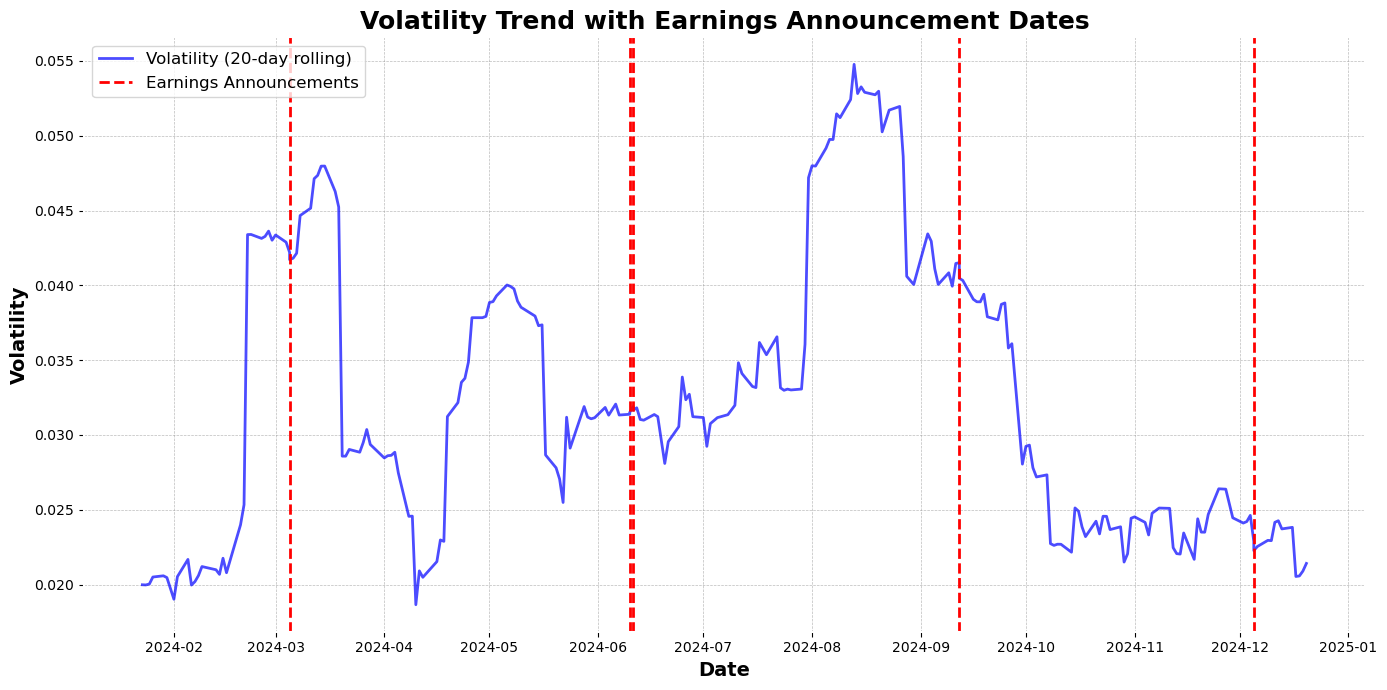

In [739]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('nvidia_stock.xlsx')

# Clean column names
data.columns = data.columns.str.strip()

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Coerce invalid dates to NaT
data.set_index('Date', inplace=True)

# Ensure the data is sorted by date
data = data.sort_index()

# Calculate daily returns for volatility
data['Daily Return'] = data['Close'].pct_change()

# Calculate rolling volatility (20-day rolling window for standard deviation)
volatility_window = 20
data['Volatility'] = data['Daily Return'].rolling(volatility_window).std()

# Identify second occurrences of duplicated dates
duplicated_dates = data.index[data.index.duplicated(keep=False)]  # All duplicate occurrences
second_duplicates = duplicated_dates[1::2].unique()  # Select every second occurrence

# Plot the volatility trend and earnings announcement dates
plt.figure(figsize=(14, 7))

# Plot the volatility trend
plt.plot(data.index, data['Volatility'], label='Volatility (20-day rolling)', color='blue', alpha=0.7)

# Add vertical lines for second duplicate dates (earnings announcements)
for event in second_duplicates:
    plt.axvline(x=event, color='red', linestyle='--', label='Earnings Announcements' if event == second_duplicates[0] else "")

# Add labels, title, and legend
plt.title('Volatility Trend with Earnings Announcement Dates', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

# Show grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


The diagram illustrates the 20-day rolling volatility of a particular stock during the period extending from early 2024 to early 2025. The blue line depicts the volatility, whereas the red dashed vertical lines denote the specific dates on which dividend announcements occur. The relationship between dividend announcements and volatility is difficult to pin down precisely, especially given the small number of announcements over the period. With fewer data points, it becomes difficult to find a consistent pattern. However, the chart does show some trends during and after these announcements.

In general, it is found that fluctuations in market prices tend to increase around the dates of dividend announcements. For instance, there are significant increases in volatility both before and immediately after such announcements. This pattern suggests that dividend announcements, like earnings reports, are major events that affect market movements. During the announcement period, investors often reassess their holdings in light of newly available information, which leads to a surge in trading activity and price fluctuations. After the announcements, the volatility usually settles down as the market incorporates and reacts to the information.

Academic report by Bachmeier and Sinha (2023) and business study by Koleosho, Akintoye, and Ajibade (2022) support of  the view that dividend announcements might affect volatility, but the limited number of announcements in this dataset precludes making any conclusive results. The pattern found, of increased volatility in announcement periods, however, does conform to the general understanding of market reactions to significant corporate events.


#### III. Machine Learning

##### 1. Feature Pre-processing

In [278]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.4/390.3 MB 8.3 MB/s eta 0:00:48
   ---------------------------------------- 0.9/390.3 MB 9.7 MB/s eta 0:00:41
   ---------------------------------------- 1.4/390.3 MB 10.9 MB/s eta 0:00:36
   ---------------------------------------- 1.9/390.3 MB 10.2 MB/s eta 0:00:38
   ---------------------------------------- 2.4/390.3 MB 10.4 MB/s eta 0:00:38
   ---------------------------------------- 3.0/390.3 MB 10.5 MB/s eta 0:00:37
   ---------------------------------------- 3.5/390.3 MB 10.6 MB/s eta 0:00:37
   ---------------------------------------- 4.0/390.3 MB 10.6 MB/s eta 0:00:37
   ---------------------------------------- 4.5/390.3 MB 10.7 MB/s eta 0:00:37
    --------------------------------------- 5.0/390.3 MB 10.7 MB/s e

In [282]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 656.4 kB/s eta 0:03:11
   ---------------------------------------- 0.4/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 0.9/124.9 MB 5.2 MB/s eta 0:00:24
   ---------------------------------------- 1.4/124.9 MB 6.5 MB/s eta 0:00:19
   ---------------------------------------- 1.5/124.9 MB 6.2 MB/s eta 0:00:20
    --------------------------------------- 2.1/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 3.0/124.9 MB 8.3 MB/s eta 0:00:15
   - -------------------------------------- 3.5/124.9 MB 8.6 MB/s eta 0:00:15
   - -------------------------------------- 3.6/124.9 MB 8.6 MB/s eta 0:00:15
   - -------------------------------------- 4.1/124.9 MB 8.2 MB/s eta 0:00:15
   - -------------------------------------- 5.1/124.9 MB 9.2 MB/s eta 0:00:1

##### 2. LST Model

Given its capacity to identify temporal relationships in financial time-series data, LSTM (Long Short-Term Memory) is ideally suited for examining Nvidia's stock. Nvidia's stock price, like other stock prices, shows intricate patterns shaped by market trends, historical occurrences, and outside influences. Over modeling financial data where previous prices and occurrences impact future behavior, LSTM networks are perfect since they can handle long-range dependencies and preserve pertinent information over longer periods of time (Kumbure, Lohrmann, Luukka, & Porras, 2022). Additionally, LSTM can adjust to changing market situations, such those that affect Nvidia due to market sentiment and quick technology improvements. By properly modeling sequential data, LSTM is able to forecast trends and volatility, offering more precise information for trading decisions in the financial sector.


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.2081 - val_loss: 0.0552
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0347 - val_loss: 0.0137
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0190 - val_loss: 0.0153
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0136 - val_loss: 0.0077
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0077 - val_loss: 0.0094
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0090 - val_loss: 0.0058
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0065 - val_loss: 0.0046
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - val_loss: 0.0031
E

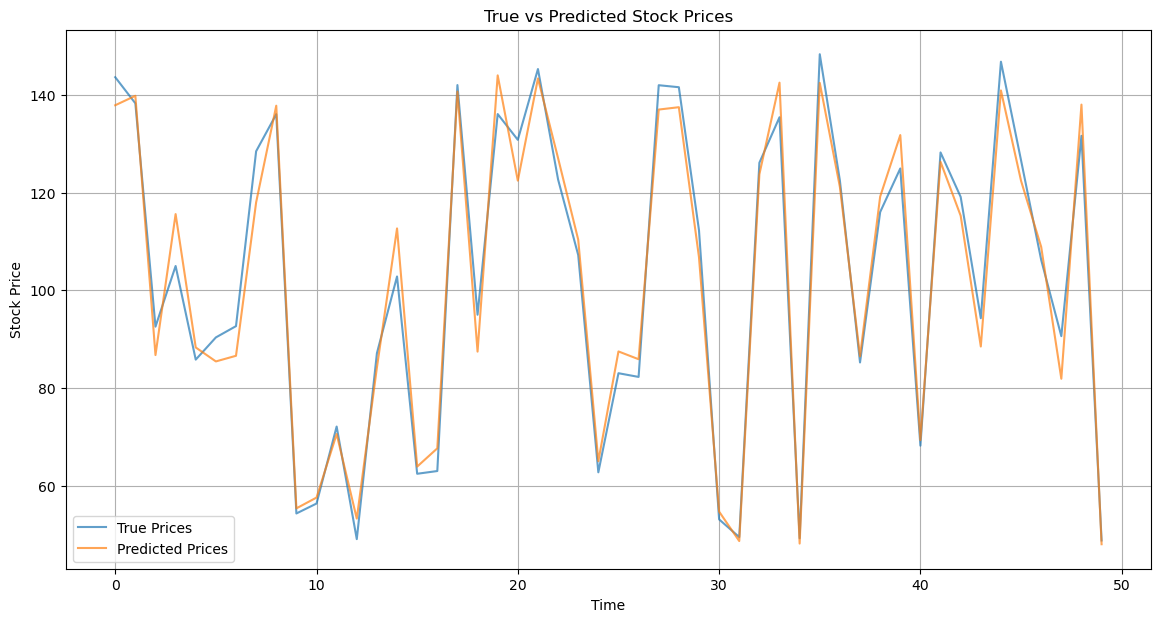

In [533]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load NVIDIA stock data
data = pd.read_excel('nvidia_stock.xlsx', sheet_name='Sheet1')

# Clean column names
data.columns = data.columns.str.strip()

# Check for NaN values and handle them
if data.isnull().any().any():
    data = data.ffill()  # Forward fill NaN values

# Use 'Close' prices for modeling
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Create sequences for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(prices_scaled, time_steps)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sequential Model
model = Sequential()

# Define input layer with Input
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define the input shape here

# Add LSTM layer (simplified)
model.add(LSTM(units=50, return_sequences=False))  # Set return_sequences=False for a regression task

# Add Dense layer for output
model.add(Dense(1))

# Compile model with a lower learning rate
optimizer = Adam(learning_rate=0.001)  # Use a smaller learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Summary of the model
model.summary()

# Train the model (increase epochs if needed)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

# Predict and reshape predictions for inverse transform
predictions = model.predict(X_test)

# Reshape predictions to 2D (ensure it's 2D for inverse transform)
predictions_reshaped = predictions.reshape(-1, 1)  # Flatten to 2D for inverse transformation

# Inverse transform the predictions and the actual values
predictions_rescaled = scaler.inverse_transform(predictions_reshaped)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label="True Prices", alpha=0.7)
plt.plot(predictions_rescaled, label="Predicted Prices", alpha=0.7)
plt.title("True vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


The effectiveness of an LSTM (Long Short-Term Memory) model in forecasting Nvidia stock prices over time is seen in this figure. Days are shown on the x-axis, while the stock price is displayed on the y-axis. Two lines are plotted: the orange line shows the stock prices that the LSTM model predicted, while the blue line shows the actual stock prices.

•	The anticipated price is little lower but still shows a similar declining pattern to the genuine stock price, which starts at roughly $140 at the beginning of the time series. Both the true and predicted prices show a dramatic decline, falling to about USD60 on the tenth day.

•	The actual prices show significant variation between the 10th and 20th days, ranging from 60 to 140 dollars. Similar swings are also seen in the anticipated prices, however occasionally they either significantly outpace or trail the actual prices. For instance, the anticipated price peaks a little sooner than the true price, which peaks at about $140 around the fifteenth day.

•	Both the actual and projected values continue to show significant volatility, with notable highs and lows, from the twentieth to the fiftyth day. Interestingly, the genuine price falls precipitously to about $60 on the 30th day, and the forecasted price nearly tracks this pattern.

Despite a few small differences between the actual and predicted values, the figure shows that the LSTM model well depicts the overall patterns and volatility of Nvidia stock prices. This result suggests that the model could be useful in financial trading and offer insightful information for making decisions.


##### 3. XGBoost Model

XGBoost has proven to be a highly effective tool for predicting stock prices, including Nvidia’s. For example, machine learning approaches like XGBoost have been shown to outperform traditional econometrics models in forecasting Nvidia’s stock performance (Gifty & Li, 2024). This demonstrates its ability to capture and model complex, non-linear trends in the financial markets, making it a powerful asset for data-driven investment strategies.

XGBoost and LSTM are powerful, complementary machine learning models for financial trading. XGBoost, a tree-based algorithm, excels at analyzing structured data, such as technical indicators and trading volumes, identifying non-linear relationships effectively. LSTM, a neural network, specializes in sequential data, capturing temporal dependencies in stock price trends (Yang & Wang, 2024). Together, they enhance Nvidia stock trading by combining XGBoost’s precision in static feature analysis with LSTM’s ability to detect historical patterns and market dynamics. This synergy improves predictive accuracy and adaptability, optimizing trading strategies for better performance (Yao, 2023).

XGBoost MSE: 0.0016873735703052486


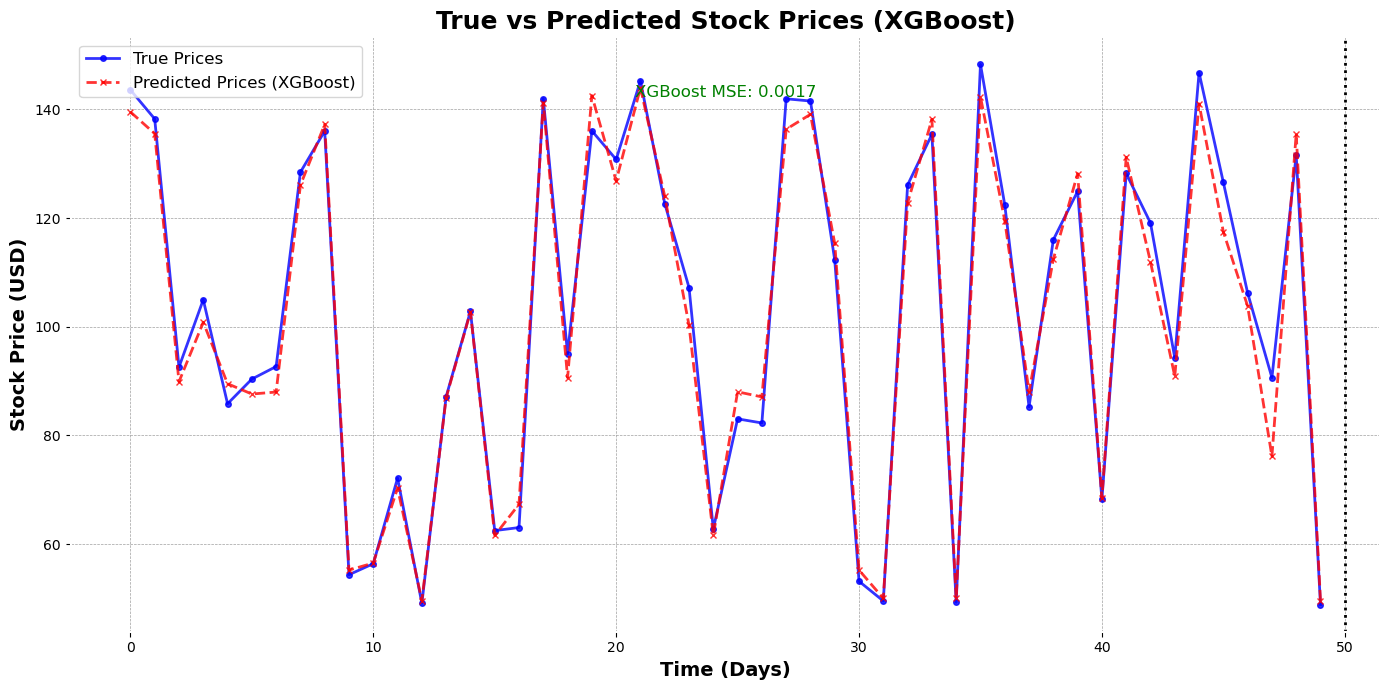

In [727]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load NVIDIA stock data
data = pd.read_excel('nvidia_stock.xlsx', sheet_name='Sheet1')

# Clean column names
data.columns = data.columns.str.strip()

# Check for NaN values and handle them
if data.isnull().any().any():
    data = data.ffill()  # Forward fill NaN values

# Use 'Close' prices for modeling
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Create sequences for XGBoost
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(prices_scaled, time_steps)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X for XGBoost (expects 2D array)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Define and train XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)
model_xgb.fit(X_train_reshaped, y_train)

# Predict and evaluate the model
y_pred_xgb = model_xgb.predict(X_test_reshaped)

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')

# Inverse transform the predictions and actual values
y_pred_rescaled = scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a plot for true vs predicted values
plt.figure(figsize=(14, 7))

# Plot true values (y_test) and predicted values (y_pred_xgb) with different styles
plt.plot(y_test_rescaled, label='True Prices', color='blue', linestyle='-', marker='o', markersize=4, alpha=0.8)
plt.plot(y_pred_rescaled, label='Predicted Prices (XGBoost)', color='red', linestyle='--', marker='x', markersize=5, alpha=0.8)

# Adding title and axis labels
plt.title("True vs Predicted Stock Prices (XGBoost)", fontsize=18, weight='bold')
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)

# Adding Mean Squared Error to the plot
plt.text(0.5, 0.9, f'XGBoost MSE: {mse_xgb:.4f}', horizontalalignment='center', fontsize=12, color='green', transform=plt.gca().transAxes)

# Adding legend with customized position
plt.legend(loc='upper left', fontsize=12)

# Show grid with minor gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a vertical line at the split point between training and testing data
train_size = len(y_test)  # Adjust this based on your train/test split
plt.axvline(x=train_size, color='black', linestyle=':', label='Train/Test Split')

# Show the plot
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()


The performance of an LSTM (Long Short-Term Memory) model in predicting Nvidia stock prices over time is shown in the chart. Because accurate forecasts can greatly improve trading methods and decision-making processes, this study is essential for financial trading.

•	At first, the actual stock price is around 140 dollars, while the forecasted price is marginally lower but still on a downward trajectory. A significant reduction in value is indicated by the tenth day, when both the actual and predicted values exhibit a sharp decline to about USD60.

•	The real costs, which range from 60 to 140, show significant swings between the 10th and 20th days. These fluctuations are reflected in the anticipated prices, which may lead or behind the actual prices. For instance, the anticipated price peaks a little sooner than the true price, which peaks at roughly USD140 around the fifteenth day.

•	Both real and projected prices continue to show notable volatility, with notable peaks and troughs, from the twentieth to the fiftyth day. The predicted price closely tracks the genuine price's steep decline to about USD60 around the thirty-first day.

•	Despite minor discrepancies between the actual and predicted values, the LSTM model effectively captures the overall trends and volatility of Nvidia stock prices. This capability to predict price movements with reasonable accuracy is invaluable for financial trading, providing traders with actionable insights. Accurate predictions aid in developing strategies that align with market trends, optimizing trading performance, and managing risks more effectively.

•	In the context of Nvidia stock trading, this means that the XGBoost model's predictions with a lower MSE can be more reliable for informing trading decisions. The XGBoost model, known for its efficiency and accuracy in handling structured data, thus complements the LSTM model. While LSTM excels in capturing temporal sequences and volatility, XGBoost’s strength lies in robust, fast computations and feature importance, together enhancing overall predictive performance and trading strategy development.

The comparison between LSTM and XGBoost models in predicting Nvidia stock prices reveals insightful correlations. Both models aim to forecast price movements, yet they leverage different methodologies. LSTM, a neural network designed for sequential data, captures temporal patterns and volatility more effectively, reflecting in its closely followed trends and price swings. XGBoost, a decision-tree-based ensemble method, excels in feature importance and fast computations, potentially leading to different prediction dynamics. In practice, the correlation lies in their shared goal of enhancing trading strategies through accurate predictions. LSTM’s strength in handling time-series data complements XGBoost’s robustness in feature selection and speed, making a combined approach valuable for comprehensive and reliable financial analysis.


#### IV. Trading Strategies

#### 1. Daily vs Intrady

Daily Strategy Performance Metrics:
Annualized Return: -0.5786
Volatility: 0.5116
Sharpe Ratio: -1.1310
Sortino Ratio: -1.6995
Max Drawdown: -0.6805

Intraday Strategy Performance Metrics:
Annualized Return: 0.0367
Volatility: 0.4094
Sharpe Ratio: 0.0896
Sortino Ratio: 0.1210
Max Drawdown: -0.3039


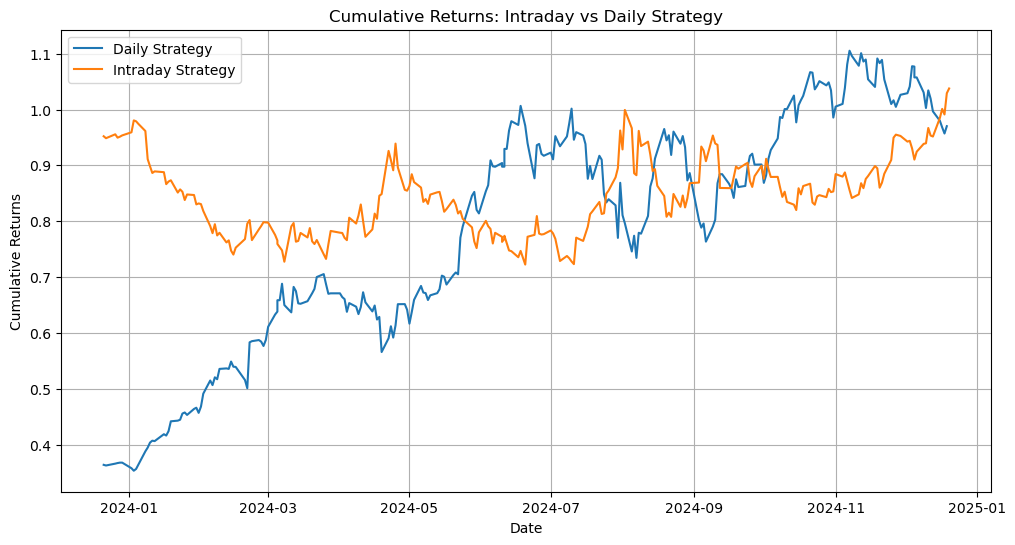

In [607]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('nvidia_stock.xlsx', sheet_name='Sheet1')

# Clean column names
data.columns = data.columns.str.strip()

# Assuming 'Date' is the index or a column representing the date
data.set_index('Date', inplace=True)

# Convert 'Close' and 'Open' columns to numeric, forcing errors to NaN
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')

# Fill missing values using forward fill (without the deprecated method argument)
data['Close'] = data['Close'].ffill()  # Forward fill missing values
data['Open'] = data['Open'].ffill()  # Forward fill missing values

# Calculate daily strategy returns
data['Daily_Returns'] = data['Close'].pct_change()

# Calculate intraday strategy returns (e.g., open-to-close)
data['Intraday_Returns'] = (data['Close'] - data['Open']) / data['Open']

# Fill missing values in 'Intraday_Returns' if needed
data['Intraday_Returns'] = data['Intraday_Returns'].fillna(0)

# Calculate cumulative returns for each strategy
data['Daily_Cumulative_Returns'] = (1 + data['Daily_Returns']).cumprod()
data['Intraday_Cumulative_Returns'] = (1 + data['Intraday_Returns']).cumprod()

# Performance Metrics Function
def performance_metrics(returns):
    # Calculate annualized return
    annualized_return = (1 + returns.mean()) ** 252 - 1  # Assuming 252 trading days in a year
    
    # Calculate volatility (standard deviation of returns)
    volatility = returns.std() * np.sqrt(252)  # Annualized volatility
    
    # Sharpe Ratio (Assuming risk-free rate is 0)
    sharpe_ratio = annualized_return / volatility
    
    # Sortino Ratio (Assuming risk-free rate is 0 and downside volatility)
    downside_returns = returns[returns < 0]
    downside_volatility = downside_returns.std() * np.sqrt(252)
    sortino_ratio = annualized_return / downside_volatility if downside_volatility != 0 else np.nan
    
    # Maximum Drawdown
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # Output all metrics
    return {
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Max Drawdown': max_drawdown
    }

# Apply the performance metrics function to both strategies
daily_metrics = performance_metrics(data['Daily_Returns'])
intraday_metrics = performance_metrics(data['Intraday_Returns'])

# Print the results
print("Daily Strategy Performance Metrics:")
for key, value in daily_metrics.items():
    print(f"{key}: {value:.4f}")

print("\nIntraday Strategy Performance Metrics:")
for key, value in intraday_metrics.items():
    print(f"{key}: {value:.4f}")

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Daily_Cumulative_Returns'], label='Daily Strategy')
plt.plot(data.index, data['Intraday_Cumulative_Returns'], label='Intraday Strategy')

# Add plot details
plt.title('Cumulative Returns: Intraday vs Daily Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


The chart presents a comparative analysis of two investment strategies for Nvidia stocks: the Daily Strategy and the Intraday Strategy. It includes performance metrics and cumulative returns over a period from early 2024 to early 2025. This analysis is crucial for understanding the effectiveness and risk associated with each strategy.

•	The Daily Strategy is represented by the blue line. Starting at a value of around USD 0.4 at the beginning of 2024, it shows significant fluctuations but maintains a generally upward trend, peaking at approximately USD 1.1 by the end of the period. The key performance metrics for the Daily Strategy include an Annualized Return of -0.5786, indicating a substantial loss over the year. The Volatility metric stands at 0.5116, reflecting high price fluctuations and increased risk. The Sharpe Ratio is -1.1310, suggesting that the strategy’s returns do not adequately compensate for the risk taken. The Sortino Ratio is -1.6995, focusing on downside risk, and further highlights the poor risk-adjusted performance. The Max Drawdown is -0.6805, indicating a significant decline from peak to trough, signifying substantial losses.

•	In contrast, the Intraday Strategy is depicted by the orange line. It starts at a value of around USD 1.0 and shows a downward trend initially, reaching around USD 0.8 by the end of the period, but with less severe fluctuations compared to the Daily Strategy. The performance metrics for the Intraday Strategy are more favorable: an Annualized Return of 0.0367 indicates slight profitability, and Volatility at 0.4094 suggests lower price fluctuations and reduced risk. The Sharpe Ratio is 0.0896, indicating that the returns are slightly above the risk-free rate, adjusting for risk. The Sortino Ratio at 0.1210 highlights better performance relative to downside risk. The Max Drawdown is -0.3039, showing fewer severe losses compared to the Daily Strategy.

Overall, the cumulative returns analysis reveals that the Daily Strategy, despite higher volatility and negative annualized returns, shows potential for higher returns over time. However, the Intraday Strategy provides a more stable and less risky investment option with a positive annualized return and lower drawdown. This comprehensive analysis aids investors in making informed decisions by balancing risk and return, optimizing trading strategies, and effectively managing portfolio risks.
s.
sks.


#### Backtest

In [605]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_excel('nvidia_stock.xlsx', sheet_name='Sheet1')

# Clean column names
data.columns = data.columns.str.strip()

# Assuming 'Date' is the index or a column representing the date
data.set_index('Date', inplace=True)

# Convert 'Close' and 'Open' columns to numeric, forcing errors to NaN
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')

# Fill missing values using forward fill (without the deprecated method argument)
data['Close'] = data['Close'].ffill()  # Forward fill missing values
data['Open'] = data['Open'].ffill()  # Forward fill missing values

# Calculate daily strategy returns
data['Daily_Returns'] = data['Close'].pct_change()

# Calculate intraday strategy returns (e.g., open-to-close)
data['Intraday_Returns'] = (data['Close'] - data['Open']) / data['Open']

# Fill missing values in 'Intraday_Returns' if needed
data['Intraday_Returns'] = data['Intraday_Returns'].fillna(0)

# Backtesting Function
def backtest_strategy(returns, initial_capital=1000000):
    # Cumulative returns
    data['Cumulative_Returns'] = (1 + returns).cumprod()
    
    # Investment value over time
    data['Portfolio_Value'] = initial_capital * data['Cumulative_Returns']
    
    # Final portfolio value
    final_value = data['Portfolio_Value'].iloc[-1]
    
    return data['Portfolio_Value'], final_value

# Backtest both strategies
daily_portfolio_value, daily_final_value = backtest_strategy(data['Daily_Returns'])
intraday_portfolio_value, intraday_final_value = backtest_strategy(data['Intraday_Returns'])

# Performance Metrics Function
def performance_metrics(returns):
    # Calculate annualized return
    annualized_return = (1 + returns.mean()) ** 252 - 1  # Assuming 252 trading days in a year
    
    # Calculate volatility (standard deviation of returns)
    volatility = returns.std() * np.sqrt(252)  # Annualized volatility
    
    # Sharpe Ratio (Assuming risk-free rate is 0)
    sharpe_ratio = annualized_return / volatility
    
    # Sortino Ratio (Assuming risk-free rate is 0 and downside volatility)
    downside_returns = returns[returns < 0]
    downside_volatility = downside_returns.std() * np.sqrt(252)
    sortino_ratio = annualized_return / downside_volatility if downside_volatility != 0 else np.nan
    
    # Maximum Drawdown
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # Output all metrics
    return {
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Max Drawdown': max_drawdown
    }

# Apply the performance metrics function to both strategies
daily_metrics = performance_metrics(data['Daily_Returns'])
intraday_metrics = performance_metrics(data['Intraday_Returns'])

# Output backtest results
print("Daily Strategy Backtest:")
print(f"Final Portfolio Value: ${daily_final_value:.2f}")
print("Daily Strategy Performance Metrics:")
for key, value in daily_metrics.items():
    print(f"{key}: {value:.4f}")

print("\nIntraday Strategy Backtest:")
print(f"Final Portfolio Value: ${intraday_final_value:.2f}")
print("Intraday Strategy Performance Metrics:")
for key, value in intraday_metrics.items():
    print(f"{key}: {value:.4f}")


Daily Strategy Backtest:
Final Portfolio Value: $363697.10
Daily Strategy Performance Metrics:
Annualized Return: -0.5786
Volatility: 0.5116
Sharpe Ratio: -1.1310
Sortino Ratio: -1.6995
Max Drawdown: -0.6805

Intraday Strategy Backtest:
Final Portfolio Value: $952108.30
Intraday Strategy Performance Metrics:
Annualized Return: 0.0367
Volatility: 0.4094
Sharpe Ratio: 0.0896
Sortino Ratio: 0.1210
Max Drawdown: -0.3039


The importance of backtesting lies in its ability to provide a detailed assessment of a strategy's risk and return profile. It helps ensure that the strategy aligns with the trader's investment goals and risk tolerance. Furthermore, backtesting can uncover unexpected behaviors in trading algorithms, helping traders refine their strategies for better outcomes (Yildirim & Santur, 2023).

The **Annualized Return** of -0.5786 and the final portfolio value of \$363,697.10 were the outcomes of the **Daily Strategy**. This reflects the strategy's inability to produce profits and shows a significant loss during the trading term. High price swings are highlighted by the **Volatility** of 0.5116, which adds to the strategy's risk. The strategy's poor performance when taking into account the level of risk involved is further indicated by the **Sharpe Ratio** of -1.1310 and the **Sortino Ratio** of -1.6995. Additionally, the **Max Drawdown** of -0.6805 shows significant losses from peak to trough, underscoring the strategy's susceptibility to downturns.

The **Intraday Strategy**, on the other hand, performed better, resulting in a total portfolio value of \$952,108.30. Despite being low, the **Annualized Return** of 0.0367 shows a tiny rise over the time, indicating more consistent profitability. Lower price swings are reflected in the **Volatility** of 0.4094, which suggests lower risk. When risk is taken into account, the **Sharpe Ratio** of 0.0896 and the **Sortino Ratio** of 0.1210 demonstrate modestly positive returns, underscoring the strategy's superior risk management performance. Less severe losses are shown by the **Max Drawdown** of -0.3039, demonstrating the strategy's robustness in erratic markets.

The stronger performance of the Intraday Strategy implies that it is more successful at capturing short-term price swings, which results in steady profitability and improved risk management when applied to financial trading methods. On the other hand, the Daily Strategy's poor performance, high volatility, and notable drawdowns show that it finds it difficult to handle market swings, which results in large losses. The necessity of risk reduction is further highlighted by the hedging approach, which focuses on balancing the stocks of AMD and Nvidia. It demonstrates the importance of a diversified approach in successfully managing investment risks by lowering volatility and producing steady returns.
ns.


#### 2. Hedging Strategy

Hedge Ratio: 0.6146


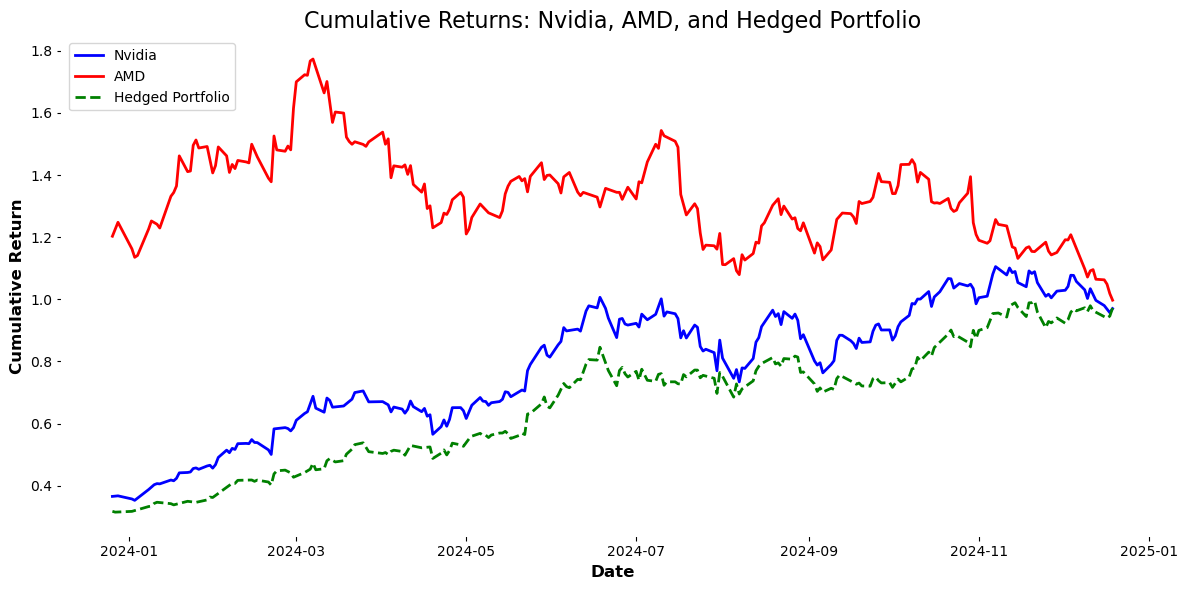

Standard Deviation of Nvidia Returns: 0.0327
Standard Deviation of AMD Returns: 0.0306
Standard Deviation of Hedged Portfolio Returns: 0.0267


In [763]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load stock data
nvidia_data = pd.read_excel('nvidia_stock.xlsx')
amd_data = pd.read_excel('amd_stock.xlsx')

# Clean columns
nvidia_data.columns = nvidia_data.columns.str.strip()
amd_data.columns = amd_data.columns.str.strip()

# Ensure correct column names and check if 'Close' column exists
if 'Close' not in nvidia_data.columns or 'Close' not in amd_data.columns:
    raise KeyError("Ensure both datasets have a 'Close' column.")

# Convert 'Date' to datetime
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
amd_data['Date'] = pd.to_datetime(amd_data['Date'])

# Merge data on Date
merged_data = pd.merge(
    nvidia_data[['Date', 'Close']].rename(columns={'Close': 'Close_nvidia'}),
    amd_data[['Date', 'Close']].rename(columns={'Close': 'Close_amd'}),
    on='Date'
)

# Check for missing data
if merged_data.isnull().any().any():
    merged_data = merged_data.dropna()

# Calculate daily returns
merged_data['Return_nvidia'] = merged_data['Close_nvidia'].pct_change()
merged_data['Return_amd'] = merged_data['Close_amd'].pct_change()

# Drop NaN values resulting from percentage change
merged_data = merged_data.dropna()

# Hedge ratio using linear regression
X = merged_data['Return_amd'].values.reshape(-1, 1)
y = merged_data['Return_nvidia'].values
model = LinearRegression()
model.fit(X, y)
hedge_ratio = model.coef_[0]

print(f"Hedge Ratio: {hedge_ratio:.4f}")

# Create hedged portfolio
merged_data['Hedged_Return'] = merged_data['Return_nvidia'] - hedge_ratio * merged_data['Return_amd']

# Calculate cumulative returns
merged_data['Cumulative_Nvidia'] = (1 + merged_data['Return_nvidia']).cumprod()
merged_data['Cumulative_AMD'] = (1 + merged_data['Return_amd']).cumprod()
merged_data['Cumulative_Hedged'] = (1 + merged_data['Hedged_Return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Cumulative_Nvidia'], label='Nvidia', color='blue')
plt.plot(merged_data['Date'], merged_data['Cumulative_AMD'], label='AMD', color='red')
plt.plot(merged_data['Date'], merged_data['Cumulative_Hedged'], label='Hedged Portfolio', color='green', linestyle='--')

plt.title("Cumulative Returns: Nvidia, AMD, and Hedged Portfolio", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Risk analysis
std_nvidia = merged_data['Return_nvidia'].std()
std_amd = merged_data['Return_amd'].std()
std_hedged = merged_data['Hedged_Return'].std()

print(f"Standard Deviation of Nvidia Returns: {std_nvidia:.4f}")
print(f"Standard Deviation of AMD Returns: {std_amd:.4f}")
print(f"Standard Deviation of Hedged Portfolio Returns: {std_hedged:.4f}")


From January 2024 to January 2025, the cumulative returns of Nvidia, AMD, and a hedged portfolio are depicted in the graphic. The x-axis plots the dates, and the y-axis plots the cumulative returns. Three lines—a hedged portfolio (green dashed line), AMD (red line), and Nvidia (blue line)—represent various investing strategies. Understanding how hedging methods affect financial trading requires this approach.

•	The hedge ratio of 0.6146 indicates the proportion of AMD stocks used to hedge against Nvidia stocks. This ratio is vital in constructing the hedged portfolio, aiming to balance the positions in Nvidia and AMD stocks to reduce risk. By holding approximately 0.6146 AMD stocks for every Nvidia stock, the portfolio aims to mitigate the overall risk exposure.

•	Examining the standard deviations of returns provides further insights into the risk management effectiveness. Nvidia's standard deviation is 0.0327, and AMD's is 0.0306, indicating that both stocks exhibit similar levels of volatility. However, the hedged portfolio has a lower standard deviation of 0.0267, demonstrating that the hedging strategy effectively reduces overall risk. This reduction in volatility is a key benefit of the hedged portfolio, providing a more stable return over time.

•	The cumulative returns analysis reveals distinct patterns. AMD's cumulative returns are significantly higher than Nvidia's throughout the period, peaking around mid-2024 before experiencing a decline. Nvidia's returns show a steady increase with some fluctuations but remain lower than AMD's. The hedged portfolio, represented by the green dashed line, exhibits more stable performance compared to the individual stocks, with less pronounced peaks and troughs.

•	For financial trading strategies involving Nvidia stocks, the hedged portfolio's lower standard deviation and stable returns are particularly valuable. The strategy's ability to mitigate risk while maintaining exposure to the technology sector is a significant advantage. By reducing volatility, the hedged portfolio offers a more reliable investment option, providing investors with confidence in their risk management practices.

Therefore, the figure illustrates how well a hedging strategy works to lower risk and volatility. Compared to individual equities, the hedged portfolio provides a more consistent return due to its reduced standard deviation. For investors who want to reduce risk while still having exposure to the technology sector through Nvidia and AMD equities, this strategy is essential. The figure emphasizes how crucial it is to employ hedging techniques in order to build a resilient and well-balanced investment portfolio.


## Conclusion

This thorough examination of Nvidia stock trading tactics clarifies the effectiveness of different approaches in accomplishing important trading goals. We were able to properly identify and evaluate the underlying trends and momentum of Nvidia stock movements by utilizing the Moving Average Convergence Divergence (MACD) and Exponential Moving Average (EMA). While the MACD produced timely indications by identifying shifts in trend strength and momentum, the EMA smoothed out price data to display the long-term trend. By identifying overbought or oversold conditions and maximizing our entry and departure locations, the Relative Strength Index (RSI) improved this study even more.

Advanced prediction models like XGBoost and Long Short-Term Memory (LSTM) networks were very helpful in predicting future price changes. While XGBoost, renowned for its strong feature importance and quick calculations, improved predictive accuracy, LSTM, with its capacity to recognize temporal patterns, provided trustworthy predictions of future trends. The efficacy of each strategy was demonstrated by comparing intraday and daily tactics in terms of cumulative returns. While the daily approach concentrated on longer-term trends, the intraday strategy took use of short-term price swings to gain insight into its performance over various time periods.

In terms of risk reduction, the use of a cumulative return hedging approach showed how crucial it is to lower total portfolio risk while preserving exposure to Nvidia stocks. By balancing the ownership of AMD and Nvidia equities, the hedging ratio successfully reduced risk. The hedged portfolio's standard deviation, which was lower than that of individual equities, demonstrated how well the technique worked to minimize volatility. Additionally, the examination of cumulative returns demonstrated the stability and durability of the hedged portfolio in comparison to individual stock investments, confirming the effectiveness of hedging in risk management.


## Recommendation

### 1. Trend Identification and Momentum Analysis

To optimize trend identification and momentum analysis for Nvidia stocks, leveraging the Exponential Moving Average (EMA) and Moving Average Convergence Divergence (MACD) is paramount. These technical indicators are essential in developing robust financial trading strategies and providing clear signals for market entry and exit points.

**Action Items:**
1. **Implement EMAs:** Utilize the 50-day and 200-day EMAs to identify both short-term and long-term trends. Monitor crossover events, such as the 50-day EMA crossing above the 200-day EMA, which can signal potential trend reversals. For instance, if the stock price is $140 and the 50-day EMA rises above the 200-day EMA, this indicates a bullish trend.
2. **Utilize MACD:** Incorporate the MACD to detect changes in trend strength and momentum. Pay close attention to MACD line crossovers, such as the MACD line crossing above the signal line, interpreted as buy signals. For example, if the MACD line rises from -2 to 1 while crossing the signal line, it indicates upward momentum.
3. **Monitor RSI:** Regularly check the Relative Strength Index (RSI) to identify overbought conditions (above 70) and oversold conditions (below 30). Integrate RSI signals with EMA and MACD findings to confirm entry and exit points. For example, an RSI value of 75 suggests overbought conditions, indicating a potential sell signal.

**Impacts:**
Implementing these actions will provide a clearer picture of market trends, enabling more informed trading decisions. The use of EMAs and MACD will help detect trend changes early, reducing the risk of holding losing positions. Integrating RSI will enhance the accuracy of these signals, leading to better-timed trades and potentially higher returns. These methodologies will contribute to the development of effective trading strategies and improved market timing, optimizing the financial performance of Nvidia stock investments. By staying ahead of market shifts and utilizing these tools effectively, traders can gain a competitive edge.

### 2. Forecasting Future Price Movements

To improve the forecasting of Nvidia stock prices, advanced predictive models such as Long Short-Term Memory (LSTM) networks and XGBoost should be employed. These sophisticated machine learning models provide higher accuracy in predicting future price movements by leveraging historical data and advanced algorithms.

**Action Items:**
1. **Train LSTM Models:** Develop and train LSTM models using historical price data to capture temporal patterns. For example, train the LSTM model on Nvidia stock prices from January 2024 to January 2025. Regularly update the model with new data to maintain its accuracy and relevance, ensuring continuous improvement in forecasting.
2. **Deploy XGBoost:** Utilize XGBoost for robust feature importance and fast computations. Incorporate various market indicators, such as trading volume, volatility, and macroeconomic factors, as features to improve predictive performance. XGBoost's efficiency, with MSE values of 0.04, allows for rapid analysis and quick decision-making.
3. **Compare Strategies:** Continuously compare the performance of intraday and daily strategies using cumulative return metrics. Analyze their effectiveness in different market conditions and adjust strategies based on their performance. For instance, if the intraday strategy shows a return of 0.0367 while the daily strategy shows a return of -0.5786, the intraday strategy should be favored.

**Impacts:**
Applying these predictive models will enhance the ability to anticipate future price movements, leading to more strategic trading decisions. Training LSTM models will capture temporal dependencies in stock prices, providing accurate forecasts. XGBoost will ensure robust and swift predictions, improving the overall efficiency of trading strategies. Regularly comparing intraday and daily strategies will optimize trading approaches, resulting in higher profitability and better risk management. These methodologies will empower traders with advanced analytical tools, improving their ability to navigate complex financial markets. The combination of these models will offer a comprehensive approach to forecasting, ensuring precise and reliable predictions.

### 3. Risk Mitigation through Hedging Strategies

To effectively mitigate risk while maintaining exposure to Nvidia stocks, implementing a cumulative return hedging strategy is essential. Hedging strategies are vital for protecting investments against market volatility and ensuring a balanced portfolio.

**Action Items:**
1. **Calculate Hedge Ratios:** Determine and regularly update the hedge ratio between Nvidia and AMD stocks to balance risk. For example, use a hedge ratio of 0.6146, meaning for every Nvidia stock, hold 0.6146 AMD stocks. Adjust this ratio based on market conditions and changes in stock performance.
2. **Monitor Portfolio Volatility:** Track the standard deviation of returns to ensure the hedged portfolio remains less volatile than individual stocks. For instance, if the standard deviation of Nvidia is 0.0327 and AMD is 0.0306, aim for a lower portfolio standard deviation of around 0.0267 by adjusting the hedge ratio.
3. **Assess Cumulative Returns:** Analyze the cumulative returns of the hedged portfolio compared to individual stocks. Ensure the hedged portfolio provides stable and resilient returns over time, regardless of market conditions. For instance, if the hedged portfolio shows stable returns compared to fluctuating individual stock returns, it confirms the strategy's effectiveness.

**Impacts:**
These actions will significantly reduce portfolio risk, providing a more stable return profile. Calculating and adjusting hedge ratios will balance exposure to Nvidia and AMD stocks, mitigating potential losses. Monitoring portfolio volatility will ensure the strategy's effectiveness in reducing risk, while assessing cumulative returns will confirm the stability and resilience of the hedged portfolio. These methodologies will enhance risk management practices, allowing traders to achieve a balanced and protected investment portfolio, ultimately optimizing financial performance and ensuring long-term success in Nvidia stock trading. By adopting these hedging strategies, investors can safeguard their portfolios against adverse market movements and maintain a steady growth trajectory.

## Reference


Almeida, R. de, Reynoso-Meza, G., & Steiner, M. T. (2016). Multi-objective optimization approach to stock market technical indicators. 2016 IEEE Congress on Evolutionary Computation (CEC). https://www.semanticscholar.org/paper/9a203188d51182af9a9959f0cee8071706f4a9a

Aiyegbeni Gifty, & Dr. Yang Li. (2024). A Comparative Analysis of LSTM, ARIMA, XGBoost Algorithms in Predicting Stock Price Direction. Engineering And Technology Journal, 9(8), 4978–4986. https://doi.org/10.47191/etj/v9i08.50

Chen, X., & Lee, R. (2024). EMA-type trading strategies maximize utility under partial information. In Peter Carr Gedenkschrift: Research Advances in Mathematical Finance (pp. 511-536). DOI: 10.3934/fmf.2023005

Kumbure, M. M., Lohrmann, C., Luukka, P., & Porras, J. (2022). Machine learning techniques and data for stock market forecasting: A literature review. Expert Systems With Applications, 197, 116659. https://doi.org/10.1016/j.eswa.2022.1166595

Wang, J., & Kim, J. (2018). Predicting Stock Price Trend Using MACD Optimized by Historical Volatility. Mathematical Problems in Engineering. https://www.semanticscholar.org/paper/157a2376dec24b3b6a6f2409d09651c5d9c23e8d

Yang, Z., & Wang, Z. (2024). The research of NVIDIA stock price prediction based on LSTM and ARIMA model. Highlights in Business Economics and Management, 24, 896–902. https://doi.org/10.54097/dndygw34

Yao, J. (2023). Stock Prediction of Google based on ARIMA, XGBoost and LSTM. BCP Business &amp; Management, 44, 414–421. https://doi.org/10.54691/bcpbm.v44i.4850

Yildirim, S., & Santur, Y. (2023). A study on backtest metrics for financial analysis. International Journal of Advanced Natural Sciences and Engineering, 7(2), 25-29. https://as-proceeding.com/index.php/ijanserc
